In [2]:
import os
import platform
import multiprocessing
import psutil
import subprocess

# Get CPU name in a cross-platform way
if platform.system() == "Windows":
    # For Windows
    cpu_name = platform.processor()

# Nombre total de cœurs logiques (threads)
threads = multiprocessing.cpu_count()

# Architecture
architecture = platform.machine()

# Mémoire RAM totale (en Go)
ram_total = round(psutil.virtual_memory().total / (1024 ** 3), 2)

# Infos affichées
print(f"Nom du CPU        : {cpu_name}")
print(f"Threads disponibles: {threads}")
print(f"Architecture       : {architecture}")
print(f"RAM totale         : {ram_total} Go")

Nom du CPU        : Intel64 Family 6 Model 186 Stepping 2, GenuineIntel
Threads disponibles: 16
Architecture       : AMD64
RAM totale         : 23.71 Go


In [18]:
import pandas as pd
labelss = pd.read_csv(r'C:\Users\Admin\Downloads\archive\trainLabels_cropped.csv')
labelss.head()

,Unnamed: 0.1,Unnamed: 0,image,level
0,0,0,10_left,0
1,1,1,10_right,0
2,2,2,13_left,0
3,3,3,13_right,0
4,4,4,15_left,1


In [19]:
labelss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35108 entries, 0 to 35107
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  35108 non-null  int64 
 1   Unnamed: 0    35108 non-null  int64 
 2   image         35108 non-null  object
 3   level         35108 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ MB


In [20]:
# Unique classes and their counts
class_counts = labels_df['level'].value_counts().sort_index()
print("Class distribution:\n", class_counts)

# Number of unique classes
print("\nNumber of unique classes:", labels_df['level'].nunique())

# List of unique class values
print("Class values:", sorted(labels_df['level'].unique()))

Class distribution:
 level
0    25802
1     2438
2     5288
3      872
4      708
Name: count, dtype: int64

Number of unique classes: 5
Class values: [0, 1, 2, 3, 4]


In [4]:
import os
import random
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

In [5]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
# Set directory paths
DIRECTORY = r'C:\Users\Admin\Downloads\archive\resized_train_cropped\resized_train_cropped'
LABELS_FILE = r'C:\Users\Admin\Downloads\archive\trainLabels_cropped.csv'

# Load labels
labels_df = pd.read_csv(LABELS_FILE)
labels_dict = dict(zip(labels_df['image'], labels_df['level']))

# Load images and labels
images = []
labels = []

train_image_count = 0

import re

# ...

for filename in os.listdir(DIRECTORY):
    if filename.endswith('.jpeg') and train_image_count < 1000:
        train_image_count += 1
        img = load_img(os.path.join(DIRECTORY, filename), target_size=(256, 256))
        img_array = img_to_array(img) / 255.0
        images.append(img_array)

        base_name = re.sub(r'\s*\(.*\)', '', filename.split('.')[0])
        label = labels_dict.get(base_name)

        if label is not None:
            labels.append(label)
        else:
            # Skip image if label is not found
            images.pop()  # remove the image you just added


images = np.array(images)
labels = np.array(labels)

# Convert labels to one-hot encoding
labels = to_categorical(labels, num_classes=5)  # Assuming there are 5 levels of diabetic retinopathy (zeyda)
print("done")

done


In [16]:
print("images shape", images.shape)
print("labels shape", labels.shape)
print("Class distribution:", np.bincount(np.argmax(labels, axis=1)))

images shape (1000, 256, 256, 3)
labels shape (1000, 5)
Class distribution: [727  66 160  26  21]


In [10]:
!pip install umap

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3550 sha256=4276d5efaee660649bfdc2c2dd6fad264768a4c58c2ecc7b926fbe0edd83a63c
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\18\d5\8e\40d69c41defe88bec50a72f118c4e604eea8e9f2e7830170c3
Successfully built umap


  DEPRECATION: Building 'umap' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'umap'. Discussion can be found at https://github.com/pypa/pip/issues/6334


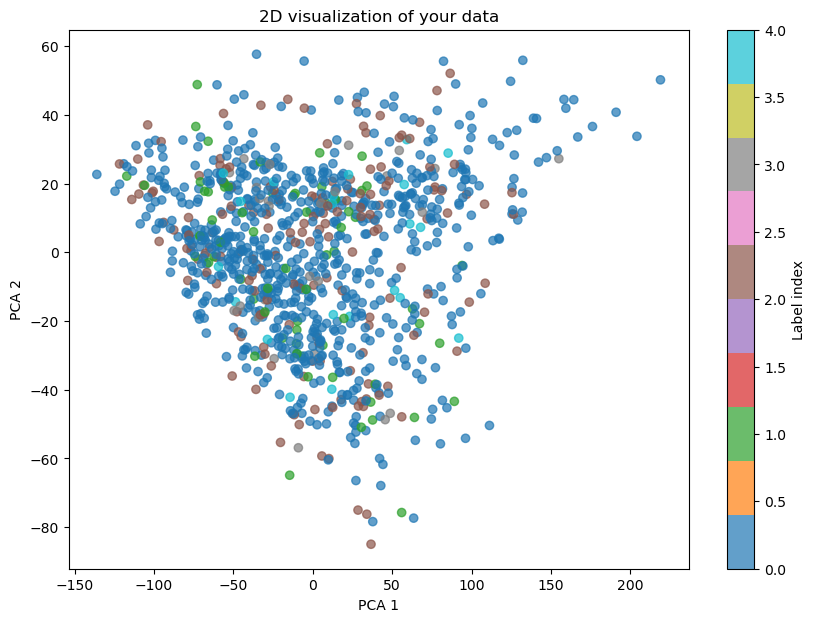

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
# Reduce to 2D using PCA (or use t-SNE if you want more separation)
X_flat = images.reshape(images.shape[0], -1)  # (1000, 64*64*3)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_flat)
y_flat = labels.argmax(axis=1)  # shape: (1000,)
# Plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_flat, cmap='tab10', alpha=0.7)
plt.title("2D visualization of your data")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(scatter, label='Label index')
plt.show()

In [21]:
X_flat.shape

(1000, 196608)

C:\Users\Admin\anaconda3\envs\new\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
C:\Users\Admin\anaconda3\envs\new\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Admin\anaconda3\envs\new\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Admin\anaconda3\envs\new\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\anaconda3\envs\new

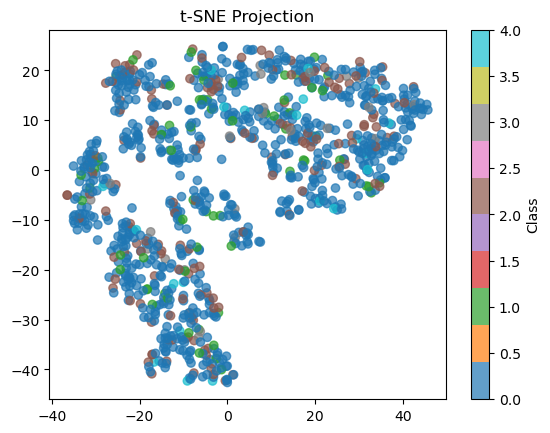

In [22]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_2d = tsne.fit_transform(X_flat)

plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_flat, cmap='tab10', alpha=0.7)
plt.title("t-SNE Projection")
plt.colorbar(label="Class")
plt.show()

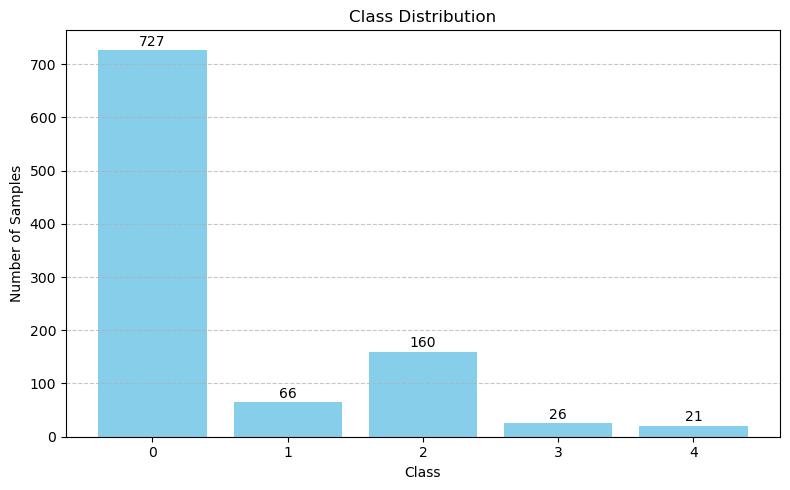

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Convert one-hot to integer labels
y_flat = labels.argmax(axis=1)

# Count samples per class
class_counts = np.bincount(y_flat)

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(range(len(class_counts)), class_counts, color='skyblue')

# Add count labels
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 2, int(yval), ha='center', va='bottom')

plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(len(class_counts)))
plt.tight_layout()
plt.show()


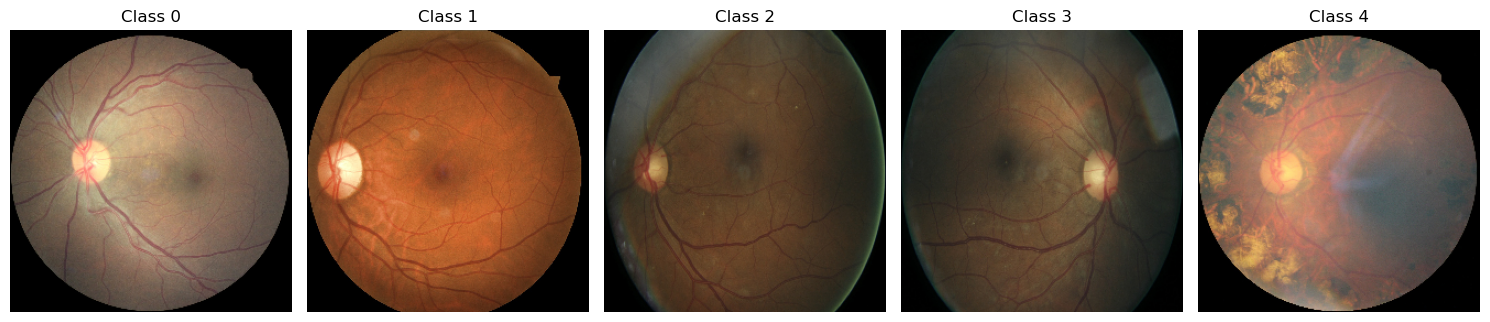

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Get number of classes
num_classes = len(np.unique(y_flat))

# Create a figure
plt.figure(figsize=(15, 5))

for class_idx in range(num_classes):
    # Find first index of this class
    i = np.where(y_flat == class_idx)[0][0]

    # Plot the image
    plt.subplot(1, num_classes, class_idx + 1)
    plt.imshow(images[i])
    plt.title(f"Class {class_idx}")
    plt.axis('off')

plt.tight_layout()
plt.show()
